In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/home-stuff_furniture-interior_sofas.csv')

# Display the first few rows
print(df.head())

  Platums x Garums: Dīvānu un gultas tips: Stāvoklis: Ražotājs:   Cena  \
0            95x284      Dīvāni viesistabu    lietota   Natuzzi  600 €   
1         1.00x2.70           Dīvāni stūra      jaun.    Латвия  700 €   
2           165x252           Dīvāni stūra    lietota      Cits  280 €   
3           240x260            Dīvāni ādas    lietota    Vācija  690 €   
4            80x170            Dīvāni ādas    lietota   Itālija  680 €   

                                                 URL  
0  https://www.ss.lv/msg/lv/home-stuff/furniture-...  
1  https://www.ss.lv/msg/lv/home-stuff/furniture-...  
2  https://www.ss.lv/msg/lv/home-stuff/furniture-...  
3  https://www.ss.lv/msg/lv/home-stuff/furniture-...  
4  https://www.ss.lv/msg/lv/home-stuff/furniture-...  


##  Data Cleaning

In [2]:
# Convert the 'Cena' column to string type
df['Cena'] = df['Cena'].astype(str)
df['Cena'] = df['Cena'].str.replace('€', '').str.replace(' ', '').astype(float)


In [7]:
print(df['Platums x Garums:'].isnull().sum())  # This will give the count of NaN values in the column.

28


In [8]:
df = df.dropna(subset=['Platums x Garums:'])

In [9]:
df['Platums'], df['Garums'] = zip(*df['Platums x Garums:'].str.split('x').tolist())
df['Platums'] = df['Platums'].str.replace(',', '.').astype(float)
df['Garums'] = df['Garums'].str.replace(',', '.').astype(float)

In [12]:
avg_width = df['Platums'].mean()
median_width = df['Platums'].median()
min_width = df['Platums'].min()
max_width = df['Platums'].max()

avg_length = df['Garums'].mean()
median_length = df['Garums'].median()
min_length = df['Garums'].min()
max_length = df['Garums'].max()

print("---- WIDTH (Platums) ----")
print(f"Average Width: {avg_width:.2f}")
print(f"Median Width: {median_width:.2f}")
print(f"Minimum Width: {min_width:.2f}")
print(f"Maximum Width: {max_width:.2f}")

print("\n---- LENGTH (Garums) ----")
print(f"Average Length: {avg_length:.2f}")
print(f"Median Length: {median_length:.2f}")
print(f"Minimum Length: {min_length:.2f}")
print(f"Maximum Length: {max_length:.2f}")


---- WIDTH (Platums) ----
Average Width: 251.74
Median Width: 160.00
Minimum Width: 0.70
Maximum Width: 3600.00

---- LENGTH (Garums) ----
Average Length: 311.88
Median Length: 200.00
Minimum Length: 0.95
Maximum Length: 3100.00


## Descriptive Analysis

In [4]:
avg_price = df['Cena'].mean()
median_price = df['Cena'].median()
min_price = df['Cena'].min()
max_price = df['Cena'].max()

### Visualisation

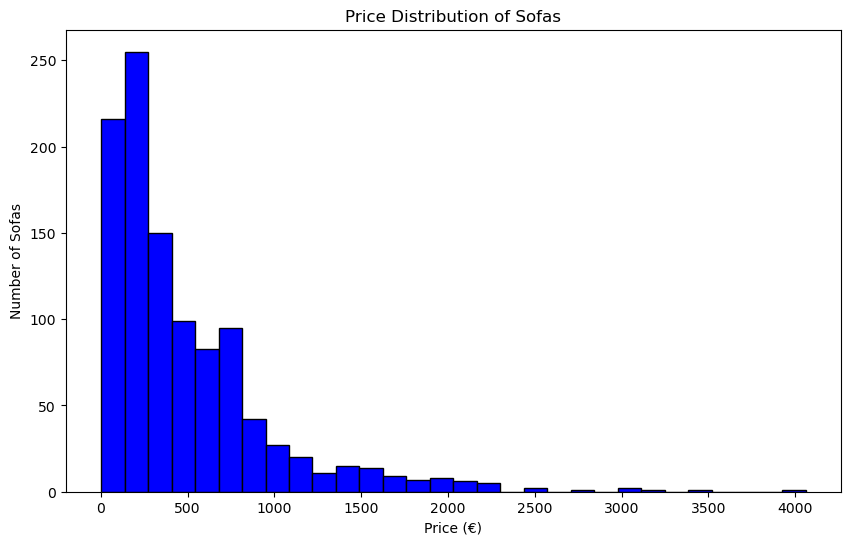

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Cena'], bins=30, color='blue', edgecolor='black')
plt.title('Price Distribution of Sofas')
plt.xlabel('Price (€)')
plt.ylabel('Number of Sofas')
plt.show()


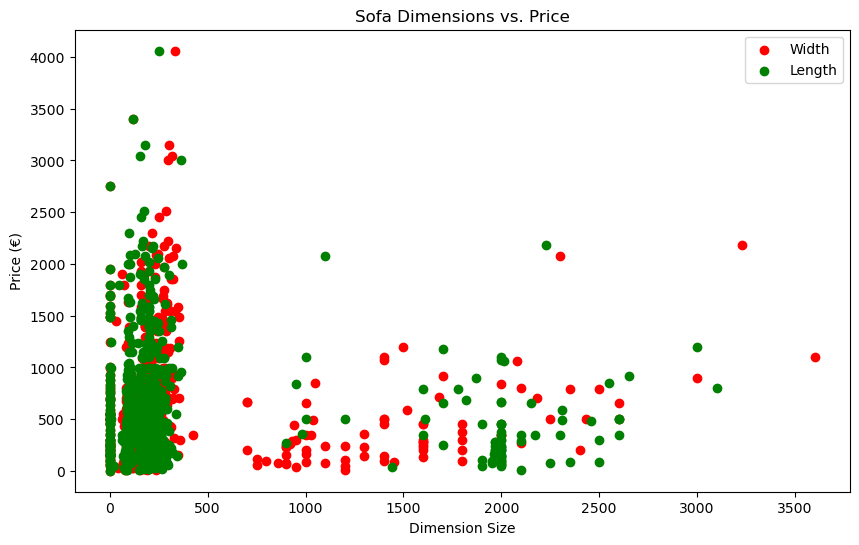

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Platums'], df['Cena'], color='red', label='Width')
plt.scatter(df['Garums'], df['Cena'], color='green', label='Length')
plt.title('Sofa Dimensions vs. Price')
plt.xlabel('Dimension Size')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

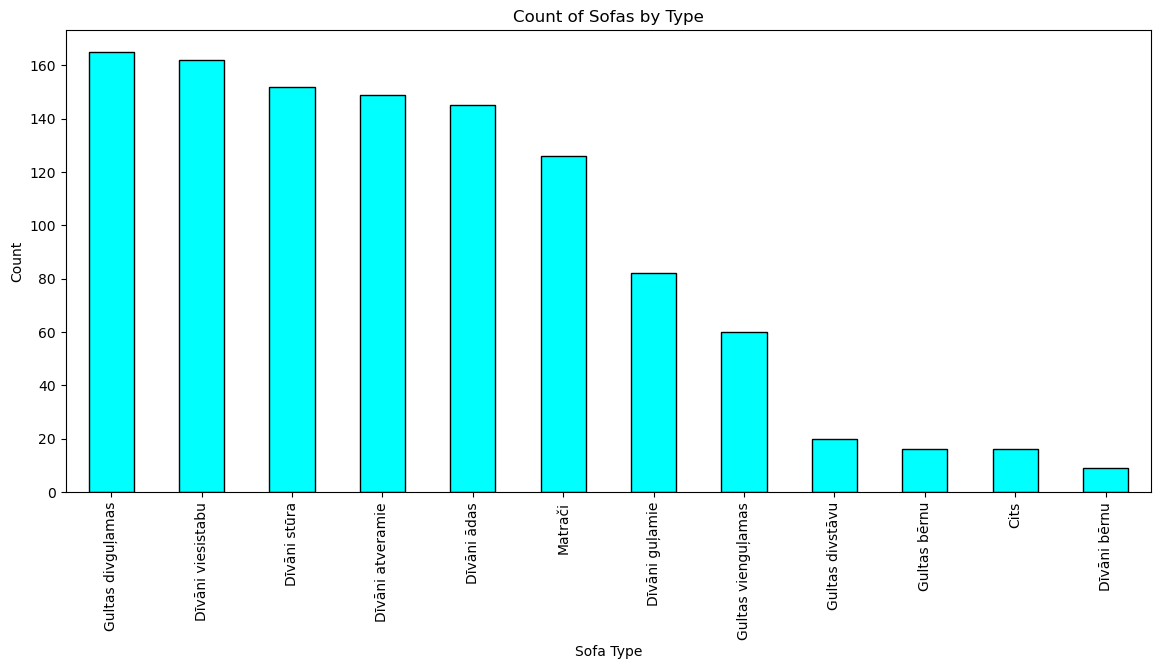

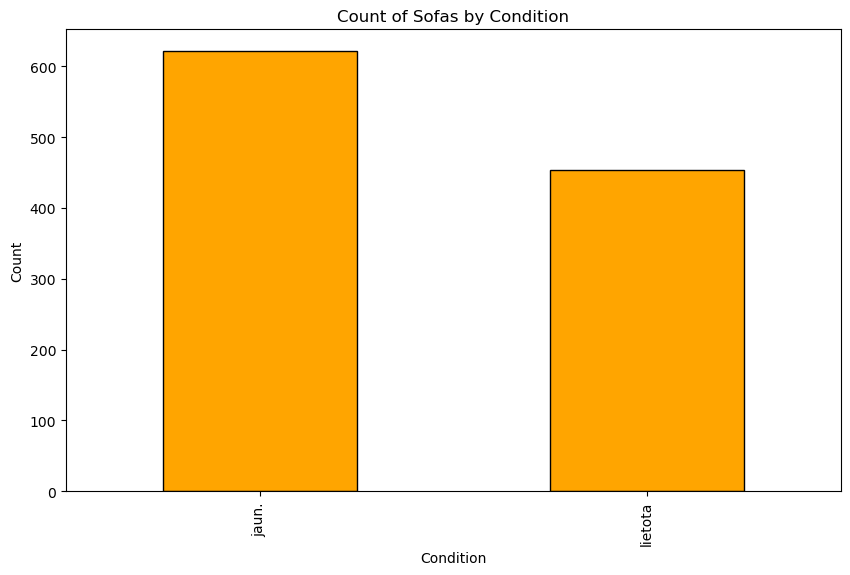

In [6]:
plt.figure(figsize=(14, 6))
df['Dīvānu un gultas tips:'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Count of Sofas by Type')
plt.xlabel('Sofa Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df['Stāvoklis:'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Count of Sofas by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()
